In [7]:
import os
#from PIL import Image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
def dirlister(root: str, meta: pd.DataFrame, mode = 'train')->list:
    mode_dict = {'train': 'path', 'sub':'ImageID'}
    image_dirs = [os.path.join(root,'images', x) for x in meta[mode_dict[mode]].values]
    if mode == 'train':
        image_path = []
        for dir in image_dirs:
            for filenames in os.listdir(dir):
                tmp = os.path.join(dir, filenames)
                if os.path.isfile(tmp) and '._' not in tmp:
                    image_path.append(tmp)
                    
    else:
        return image_dirs
        
    return image_path

def sub_csv(root, start: int, end: int):
    return pd.read_csv(os.path.join(root, 'train.csv')).iloc[start-1:end + 1, :]

In [3]:
TRAIN_DATA_ROOT = '/opt/ml/input/data/train/'
SUB_DATA_ROOT = '/opt/ml/input/data/eval/'
start = 900
end = 2699

train_meta = sub_csv(TRAIN_DATA_ROOT, start, end)
train_dir = dirlister(TRAIN_DATA_ROOT, train_meta)

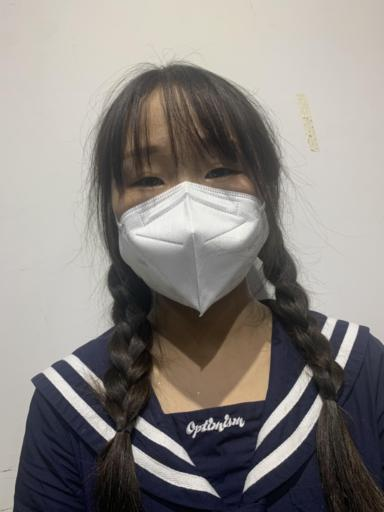

/opt/ml/input/data/train/images/006484_female_Asian_18/mask1.jpg
is mask1? press 0 if correct, else 1


In [ ]:
from IPython.display import clear_output

mask_error = []
gender_error = []
age_error = []
valid = [0, 1]

for idx, dir in enumerate(train_dir):
    display(Image(dir))
    
    gender_age = dir.split('/')[-2].split("_")
    gender = gender_age[1]
    age = gender_age[-1]
    label = dir.split('/')[-1].split(".")[0]
    
    while True:
        try:
            print(dir)
            print(f'is {label}? press 0 if correct, else 1')
            m = int(input())

            print(f'is {gender}? press 0 if correct, else 1')
            g = int(input())

            print(f'is {age} year old? press 0 if correct, else 1')
            a = int(input())

            if m in valid and g in valid and a in valid:
                if m:
                    mask_error.append(dir)
                if g:
                    mask_error.append(dir)
                if a:
                    mask_error.append(dir)

                break

            else:
                print('wrong. try again')
        except KeyboardInterrupt:
            print('userinterupt. start again')
            raise Exception
            break
        except:
            print('wrong. try again')

                
    clear_output()
        

[]
